• DOMAIN: 
    Startup ecosystem
    
• CONTEXT: 
Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the business related to technology news, analysis of emerging trends and profiling of new tech businesses and products. Their event i.e. Startup Battlefield is the world’s pre-eminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience, present in person and online.

• DATA DESCRIPTION: CompanyX_EU.csv - Each row in the dataset is a Start-up company and the columns describe the company. ATTRIBUTE
INFORMATION:
1. Startup: Name of the company
2. Product: Actual product
3. Funding: Funds raised by the company in USD
4. Event: The event the company participated in
5. Result: Described by Contestant, Finalist, Audience choice, Winner or Runner up
6. OperatingState: Current status of the company, Operating ,Closed, Acquired or IPO
*Dataset has been downloaded from the internet. All the credit for the dataset goes to the original creator of the data.
• PROJECT OBJECTIVE: Analyse the data of the various companies from the given dataset and perform the tasks that are specified in the
below steps. Draw insights from the various attributes that are present in the dataset, plot distributions, state hypotheses and draw
conclusions from the dataset.
Steps and tasks: [ Total Score: 30 points]
1. Data warehouse:
    • Read the CSV file.
2. Data exploration:
    • Check the datatypes of each attribute.
    • Check for null values in the attributes.
3. Data preprocessing & visualisation:
    • Drop the null values.
    • Convert the ‘Funding’ features to a numerical value.
    • Plot box plot for funds in million.
    • Get the lower fence from the box plot.
    • Check number of outliers greater than upper fence.
    • Drop the values that are greater than upper fence.
    • Plot the box plot after dropping the values.
    • Check frequency of the OperatingState features classes.
    • Plot a distribution plot for Funds in million.
    • Plot distribution plots for companies still operating and companies that closed.
4. Statistical analysis:
    • Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?
        Write the null hypothesis and alternative hypothesis.
        Test for significance and conclusion
    • Make a copy of the original data frame.
    • Check frequency distribution of Result variable.
    • Calculate percentage of winners that are still operating and percentage of contestants that are still operating
    • Write your hypothesis comparing the proportion of companies that are operating between winners and contestants
         Write the null hypothesis and alternative hypothesis.
         Test for significance and conclusion
    • Check distribution of the Event variable.
    • Select only the Event that has disrupt keyword from 2013 onwards.
    • Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 2013 onwards.
    • Plot the distribution plot comparing the 3 city events.
5. Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform a better data analysis

# STEPS INVOLVED IN THE CASE STUDY

1.Data acquisition

2.Data glancing

Getting a high-level idea about the data, dimensions

3.EDA

    Univariate -datatype,Describe,Measures of central tendency,Measure of dispersion,IQR,Plots (Histogram),Missing values,Outliers

    Bivariate

    Multivariate

4.Analysis

5.Summary and Findings

# Import the libraries

In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Import the dataset

1. Importing the dataset and reading the csv file

In [46]:
compdata = pd.read_csv('CompanyX_EU.csv')
#new_compdata = compdata.copy()
print(compdata.shape)
compdata.head()

(662, 6)


,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


# Data Exploration
1. Checking for data types and any null values

In [47]:
compdata.dtypes

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

In [48]:
# Checking for null values

compdata.isnull()

,Startup,Product,Funding,Event,Result,OperatingState
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,True,False,False,False
3,False,False,False,False,False,False
4,False,False,True,False,False,False
...,...,...,...,...,...,...
657,False,False,False,False,False,False
658,False,False,False,False,False,False
659,False,False,False,False,False,False
660,False,False,False,False,False,False


So, turns out that there are few columns in which the funding is not in numeric as the datatype returned as object.

Also, there are many null values in the given dataset.

Hence, before proceeding we need to drop the nullvalue as part of clean-up of data

# Data Pre-processing

# We need to drop all rows where Funding is null

In [49]:
compdata.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)

print(compdata)

          Startup          Product Funding                      Event  \
1            3DLT         3dlt.com   $630K           Disrupt NYC 2013   
3      3Dprintler   3dprintler.com     $1M            Disrupt NY 2016   
5            5to1         5to1.com  $19.3M                  TC50 2009   
6    8 Securities  8securities.com    $29M       Disrupt Beijing 2011   
10     AdhereTech   adheretech.com   $1.8M  Hardware Battlefield 2014   
..            ...              ...     ...                        ...   
657        Zivity       zivity.com     $8M                  TC40 2007   
658        Zmorph     zmorph3d.com     $1M                          -   
659        Zocdoc       zocdoc.com   $223M                  TC40 2007   
660          Zula      zulaapp.com   $3.4M            Disrupt SF 2013   
661        Zumper       zumper.com  $31.5M            Disrupt SF 2012   

              Result OperatingState  
1         Contestant         Closed  
3    Audience choice      Operating  
5        

In [50]:
compdata.isnull()

,Startup,Product,Funding,Event,Result,OperatingState
1,False,False,False,False,False,False
3,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
10,False,False,False,False,False,False
...,...,...,...,...,...,...
657,False,False,False,False,False,False
658,False,False,False,False,False,False
659,False,False,False,False,False,False
660,False,False,False,False,False,False


 # Converting the ‘Funding’ features to a numerical value.

In [51]:
compdata['Funding'].sample(10) # listing the column to see actual data values

323     $250K
18     $12.2M
83       $20K
503     $700K
493       $6M
190     $6.5M
596       $3M
211     $1.9M
572     $6.3M
239     $4.5M
Name: Funding, dtype: object

In [52]:
# forming a new column from existing column so that it holds a numerical value

compdata['Funding_in_millions'] = compdata['Funding'].str.replace('$','')

print(compdata)

          Startup          Product Funding                      Event  \
1            3DLT         3dlt.com   $630K           Disrupt NYC 2013   
3      3Dprintler   3dprintler.com     $1M            Disrupt NY 2016   
5            5to1         5to1.com  $19.3M                  TC50 2009   
6    8 Securities  8securities.com    $29M       Disrupt Beijing 2011   
10     AdhereTech   adheretech.com   $1.8M  Hardware Battlefield 2014   
..            ...              ...     ...                        ...   
657        Zivity       zivity.com     $8M                  TC40 2007   
658        Zmorph     zmorph3d.com     $1M                          -   
659        Zocdoc       zocdoc.com   $223M                  TC40 2007   
660          Zula      zulaapp.com   $3.4M            Disrupt SF 2013   
661        Zumper       zumper.com  $31.5M            Disrupt SF 2012   

              Result OperatingState Funding_in_millions  
1         Contestant         Closed                630K  
3    Au

In [53]:
# Forming a new column to hold if the amount mentioned is in K, M or in B

compdata['Value'] = compdata.Funding_in_millions.str.extract(r'[\d\.]+([KMB]+)', expand=False)


print(compdata)

          Startup          Product Funding                      Event  \
1            3DLT         3dlt.com   $630K           Disrupt NYC 2013   
3      3Dprintler   3dprintler.com     $1M            Disrupt NY 2016   
5            5to1         5to1.com  $19.3M                  TC50 2009   
6    8 Securities  8securities.com    $29M       Disrupt Beijing 2011   
10     AdhereTech   adheretech.com   $1.8M  Hardware Battlefield 2014   
..            ...              ...     ...                        ...   
657        Zivity       zivity.com     $8M                  TC40 2007   
658        Zmorph     zmorph3d.com     $1M                          -   
659        Zocdoc       zocdoc.com   $223M                  TC40 2007   
660          Zula      zulaapp.com   $3.4M            Disrupt SF 2013   
661        Zumper       zumper.com  $31.5M            Disrupt SF 2012   

              Result OperatingState Funding_in_millions Value  
1         Contestant         Closed                630K    

In [54]:
# Now separating the prefix attached to funding in millions columns as new column 'Value' already holds if its K, M, or B
compdata['Funding_in_millions'] = compdata['Funding_in_millions'].str.replace('K','').str.replace('M','').str.replace('B','')
print(compdata)

          Startup          Product Funding                      Event  \
1            3DLT         3dlt.com   $630K           Disrupt NYC 2013   
3      3Dprintler   3dprintler.com     $1M            Disrupt NY 2016   
5            5to1         5to1.com  $19.3M                  TC50 2009   
6    8 Securities  8securities.com    $29M       Disrupt Beijing 2011   
10     AdhereTech   adheretech.com   $1.8M  Hardware Battlefield 2014   
..            ...              ...     ...                        ...   
657        Zivity       zivity.com     $8M                  TC40 2007   
658        Zmorph     zmorph3d.com     $1M                          -   
659        Zocdoc       zocdoc.com   $223M                  TC40 2007   
660          Zula      zulaapp.com   $3.4M            Disrupt SF 2013   
661        Zumper       zumper.com  $31.5M            Disrupt SF 2012   

              Result OperatingState Funding_in_millions Value  
1         Contestant         Closed                 630    

In [55]:
compdata.Funding_in_millions = compdata.Funding_in_millions.astype("float")
compdata.Funding_in_millions.dtype

dtype('float64')

In [56]:

# Now we need to bring all values under 'Funding_in_millions' to hold the same denominations

# if value is 'K' then we need to formulate (Funding_in_millions/1000)
# if value is 'M' then we need to assign Funding_in_millions is as it is
# if value is 'B' then we need to formulate (Funding_in_millions*1000)

compdata["Funding_in_millions"] = compdata.apply(lambda row: row["Funding_in_millions"]/1000 
                                                                 if(row["Value"]=="K") 
                                                 else row["Funding_in_millions"]*1000 if(row["Value"]=="B") else row["Funding_in_millions"]
                                                , axis=1)

In [57]:
compdata.Value.value_counts()

M    309
K    136
B      1
Name: Value, dtype: int64

In [58]:
compdata["Funding_in_millions"].describe()

count     446.000000
mean       17.241489
std        90.483710
min         0.005000
25%         0.745250
50%         2.200000
75%         9.475000
max      1700.000000
Name: Funding_in_millions, dtype: float64

In [59]:
print(compdata)

          Startup          Product Funding                      Event  \
1            3DLT         3dlt.com   $630K           Disrupt NYC 2013   
3      3Dprintler   3dprintler.com     $1M            Disrupt NY 2016   
5            5to1         5to1.com  $19.3M                  TC50 2009   
6    8 Securities  8securities.com    $29M       Disrupt Beijing 2011   
10     AdhereTech   adheretech.com   $1.8M  Hardware Battlefield 2014   
..            ...              ...     ...                        ...   
657        Zivity       zivity.com     $8M                  TC40 2007   
658        Zmorph     zmorph3d.com     $1M                          -   
659        Zocdoc       zocdoc.com   $223M                  TC40 2007   
660          Zula      zulaapp.com   $3.4M            Disrupt SF 2013   
661        Zumper       zumper.com  $31.5M            Disrupt SF 2012   

              Result OperatingState  Funding_in_millions Value  
1         Contestant         Closed                 0.63  

# Plotting box plot for Funding_in_millions.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


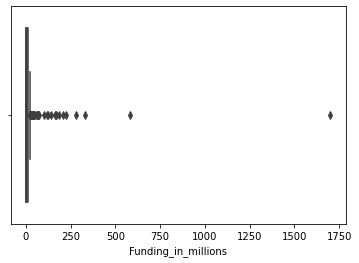

In [60]:
sns.boxplot(compdata['Funding_in_millions']);

Here we can see outliers. So we need to remove them first before processing further.

# Getting the upper & lower fence from the box plot.

In [61]:
# Getting the quantile values
Q1 = compdata['Funding_in_millions'].quantile(0.25)
Q3 = compdata['Funding_in_millions'].quantile(0.75)

IQR = Q3-Q1

print(IQR)

8.72975


In [62]:
Lower_Fence = Q1 - (1.5 * IQR)
Lower_Outer_Fence = Q1 - (3 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
Upper_Outer_Fence = Q3 + (3 * IQR)

print(Lower_Fence)
print(Lower_Outer_Fence)
print(Upper_Fence)
print(Upper_Outer_Fence)

-12.349374999999998
-25.444
22.569625
35.664249999999996


# Check number of outliers greater than upper fence.


In [63]:
# Now we print the outlier data

compdata[((compdata["Funding_in_millions"] < Lower_Fence) |(compdata["Funding_in_millions"] > Upper_Fence))]
#compdata.shape

,Startup,Product,Funding,Event,Result,OperatingState,Funding_in_millions,Value
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.0,M
31,Anyclip,anyclip.com,$24M,TC50 2009,Finalist,Operating,24.0,M
40,Artsy,artsy.net,$50.9M,Disrupt NYC 2010,Contestant,Operating,50.9,M
49,Badgeville,badgeville.com,$40M,Disrupt SF 2010,Finalist,Acquired,40.0,M
56,Betterment,betterment.com,$205M,Disrupt NYC 2010,Finalist,Operating,205.0,M
108,Clickable,clickable.com,$32.5M,TC40 2007,Finalist,Acquired,32.5,M
113,Cloudflare,cloudflare.com,$182.1M,Disrupt SF 2010,Runner up,Operating,182.1,M
128,Credit Sesame,creditsesame.com,$35.4M,Disrupt SF 2010,Contestant,Operating,35.4,M
130,CrowdFlower Inc.,crowdflower.com,$38M,TC50 2009,Contestant,Operating,38.0,M
132,Cubic Telecom,cubictelecom.com,$37.1M,TC40 2007,Contestant,Operating,37.1,M


  #  Dropping out the  outliers
   


In [64]:
#Filter out the outlier data and print only the potential data. To do so, just negate the preceding result using the ~ operator:

compdata = compdata[~((compdata["Funding_in_millions"] < Lower_Fence) |(compdata["Funding_in_millions"] > Upper_Fence))]

compdata

,Startup,Product,Funding,Event,Result,OperatingState,Funding_in_millions,Value
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63,K
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00,M
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30,M
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80,M
11,AdRocket,adrocket.com,$1M,TC50 2008,Contestant,Closed,1.00,M
...,...,...,...,...,...,...,...,...
645,Yap,yapme.com,$10M,TC40 2007,Contestant,Closed,10.00,M
646,YayPay Inc,yaypay.com,$900K,Disrupt London 2015,Contestant,Operating,0.90,K
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8.00,M
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1.00,M



# Plotting the boxplot after removing the outliers

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


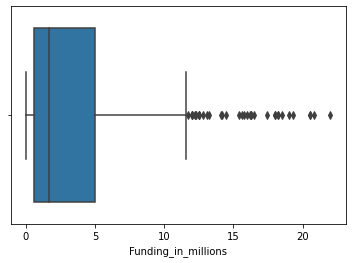

In [65]:
sns.boxplot(compdata['Funding_in_millions']);

#  Checking frequency of the OperatingState features classes.

In [66]:
compdata.OperatingState.value_counts()

Operating    275
Closed        56
Acquired      55
Name: OperatingState, dtype: int64

#  Plotting a distribution plot for Funds in million.

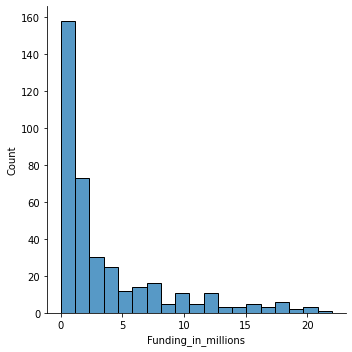

In [68]:
sns.displot(compdata["Funding_in_millions"])

In [69]:
compdata.Funding_in_millions.describe()

count    386.00000
mean       3.72514
std        4.73236
min        0.00500
25%        0.60000
50%        1.70000
75%        5.00000
max       22.00000
Name: Funding_in_millions, dtype: float64

# Plotting distribution plots for companies still operating and companies that closed.

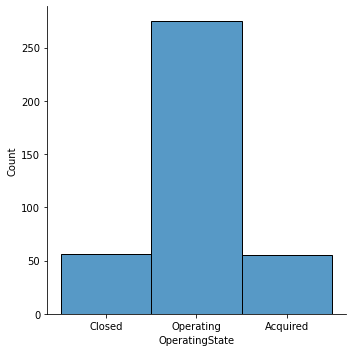

In [70]:
sns.displot(compdata["OperatingState"])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Funding_in_millions', ylabel='Density'>

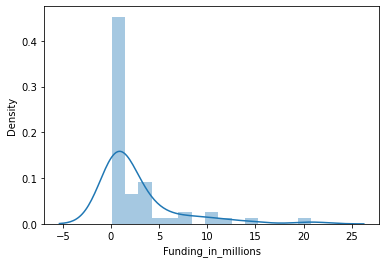

In [27]:
#sns.displot(compdata.loc[compdata.OperatingState == "Closed", 'Funding_in_millions'])
sns.distplot(compdata.loc[compdata.OperatingState == 'Closed', 'Funding_in_millions'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Funding_in_millions', ylabel='Density'>

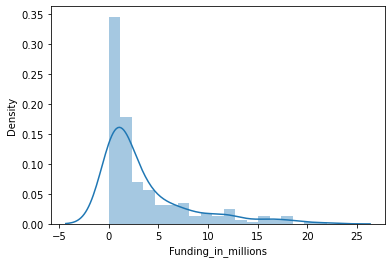

In [71]:
sns.distplot(compdata.loc[compdata.OperatingState == 'Operating', 'Funding_in_millions'])

# Statistical analysis:
    • Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?
        Write the null hypothesis and alternative hypothesis.
        Test for significance and conclusion

Let the mean funds raised by companies still operating = M1

Let the mean funds raised by companies that are closed = M2

Null hypothesis: There's no significant difference between the funds i.e M1 = M2

Alternate hypo : There's significant difference between the funds i.e M<>M2
    


# Performing Z test :

In [72]:
from statsmodels.stats.weightstats import ztest

sample1 = compdata.loc[compdata.OperatingState == 'Operating', 'Funding_in_millions']
sample2 = compdata.loc[compdata.OperatingState =='Closed', 'Funding_in_millions']

#print(sample1, sample2)

 # Let's consider a significance level of 5%

alpha = 0.05  

test_statistic, p_value = ztest(sample1, sample2)

print('p_value obtained -->',round(p_value,3))

if p_value <= alpha:
    print('The difference is significant and we reject the Null hypothesis')
else:
    print('The difference is not significant and,we fail to reject the null hypothesis''')


p_value obtained --> 0.192
The difference is not significant and,we fail to reject the null hypothesis


# t-test

In [73]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(sample1, sample2)

print('p_value obtained -->',round(p_value,3))

if p_value <= alpha:
    print('The difference is significant and we reject the Null hypothesis')
else:
    print('The difference is not significant and,we fail to reject the null hypothesis''')


p_value obtained --> 0.193
The difference is not significant and,we fail to reject the null hypothesis


From the above two tests, there is no  evidence to show that there is significant difference between funds raised by the
companies that are not operating and that are closed, and hence we fail to reject the null hypothesis

In [74]:
new_compdata = compdata.copy(deep = True)
new_compdata

,Startup,Product,Funding,Event,Result,OperatingState,Funding_in_millions,Value
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63,K
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00,M
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30,M
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80,M
11,AdRocket,adrocket.com,$1M,TC50 2008,Contestant,Closed,1.00,M
...,...,...,...,...,...,...,...,...
645,Yap,yapme.com,$10M,TC40 2007,Contestant,Closed,10.00,M
646,YayPay Inc,yaypay.com,$900K,Disrupt London 2015,Contestant,Operating,0.90,K
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8.00,M
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1.00,M


# Calculate percentage of winners that are still operating and percentage of contestants that are still operating¶

In [75]:
new_compdata.Result.value_counts()

Contestant         282
Finalist            52
Audience choice     20
Winner              17
Runner up           15
Name: Result, dtype: int64

In [76]:
new_compdata.OperatingState.value_counts()

Operating    275
Closed        56
Acquired      55
Name: OperatingState, dtype: int64

# Percentage of winners that are still operating:


In [77]:
# Percentage of winners still operating

option = ['Operating']    
res_winners = new_compdata[(new_compdata['Result'] == 'Winner') &
                          new_compdata['OperatingState'].isin(option)]
winners_rows = len(res_winners.axes[0]) # gives count of winners still operating

total_rows = len(new_compdata.axes[0]) # gives count of total entries in the given dataset

percent_val = (winners_rows)/(total_rows)

print('% of Winners that are still operating --> ', percent_val)

% of Winners that are still operating -->  0.031088082901554404


# Percentage of contestants that are still operating

In [78]:
option = ['Operating']    
res_contestants = new_compdata[(new_compdata['Result'] == 'Contestant') &
                          new_compdata['OperatingState'].isin(option)]
contestant_rows = len(res_contestants.axes[0]) # gives count of contestants still operating
print(contestant_rows)
total_rows = len(new_compdata.axes[0]) # gives count of total entries in the given dataset

contestant_val = (contestant_rows)/(total_rows)

print('% of Contestants that are still operating --> ', contestant_val)

194
% of Contestants that are still operating -->  0.5025906735751295


# Write your hypothesis comparing the proportion of companies that are operating between winners and contestants Write the null hypothesis and alternative hypothesis. Test for significance and conclusion



Null Hypothesis : The proportion companies operating between winners and contestants are the same

Alternate Hypothesis : The proportion of companies operating between the two categories are not same
    
Since, its proportion we need to do chi-square test.   


In [79]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

alpha = 0.95
p_value = chi2.ppf(percent_val, contestant_val)

print('p_value-->',p_value)

if p_value <= alpha:
    print('The difference is significant and we reject the Null hypothesis')
else:
    print('The difference is not significant and,we fail to reject the null hypothesis''')

p_value--> 1.3556369471455671e-06
The difference is significant and we reject the Null hypothesis


Since p_value is less than the level of significance value, we Reject the null hypothesis.


Hence, the amount of funds raised by a company doesnt seem to be a strong factor to decide if the company is still operating 
or it is in closed status.




In [80]:
new_compdata

,Startup,Product,Funding,Event,Result,OperatingState,Funding_in_millions,Value
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63,K
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00,M
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30,M
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80,M
11,AdRocket,adrocket.com,$1M,TC50 2008,Contestant,Closed,1.00,M
...,...,...,...,...,...,...,...,...
645,Yap,yapme.com,$10M,TC40 2007,Contestant,Closed,10.00,M
646,YayPay Inc,yaypay.com,$900K,Disrupt London 2015,Contestant,Operating,0.90,K
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8.00,M
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1.00,M


# Checking for distribution of Event 

In [81]:
new_compdata.Event.value_counts()

TC50 2008                    25
TC40 2007                    22
Disrupt NY 2015              21
Disrupt NYC 2013             19
TC50 2009                    19
Disrupt SF 2013              19
Disrupt SF 2014              19
Disrupt NYC 2012             19
Disrupt SF 2015              19
Disrupt SF 2011              19
Disrupt SF 2016              17
Disrupt NY 2016              16
Disrupt NYC 2014             15
Disrupt NYC 2011             15
Disrupt SF 2012              15
Disrupt SF 2010              13
Hardware Battlefield 2016    12
Hardware Battlefield 2014    12
Disrupt London 2015          11
Disrupt NYC 2010             10
Hardware Battlefield 2015    10
Disrupt EU 2014              10
Disrupt London 2016          10
Disrupt EU 2013               9
-                             6
Disrupt Beijing 2011          4
Name: Event, dtype: int64

# Select only the Event that has disrupt keyword from 2013 onwards.

In [82]:
#option = ['Disrupt']    
#res_event = new_compdata[(new_compdata['Event'].isin(option))]

#print(res_event)

#compdata["Funding_in_millions"] = compdata.apply(lambda row: row["Funding_in_millions"]/1000 
#                                                                 if(row["Value"]=="K") 
#                                                 else row["Funding_in_millions"]*1000 if(row["Value"]=="B") else row["Funding_in_millions"]
#                                                , axis=1)
            
new_compdata[new_compdata.Event.apply(lambda x: 'Disrupt' in x)].Event.value_counts()

Disrupt NY 2015         21
Disrupt NYC 2013        19
Disrupt SF 2011         19
Disrupt SF 2015         19
Disrupt SF 2013         19
Disrupt NYC 2012        19
Disrupt SF 2014         19
Disrupt SF 2016         17
Disrupt NY 2016         16
Disrupt SF 2012         15
Disrupt NYC 2011        15
Disrupt NYC 2014        15
Disrupt SF 2010         13
Disrupt London 2015     11
Disrupt EU 2014         10
Disrupt NYC 2010        10
Disrupt London 2016     10
Disrupt EU 2013          9
Disrupt Beijing 2011     4
Name: Event, dtype: int64

In [83]:
new_compdata['Event']

1               Disrupt NYC 2013
3                Disrupt NY 2016
5                      TC50 2009
10     Hardware Battlefield 2014
11                     TC50 2008
                 ...            
645                    TC40 2007
646          Disrupt London 2015
657                    TC40 2007
658                            -
660              Disrupt SF 2013
Name: Event, Length: 386, dtype: object

In [84]:
total_events = new_compdata[new_compdata.Event.apply(lambda x: 'Disrupt' in x and int(x[-4:]) > 2012)].Event
print(total_events)

1         Disrupt NYC 2013
3          Disrupt NY 2016
13         Disrupt SF 2015
14     Disrupt London 2016
16         Disrupt SF 2015
              ...         
635        Disrupt NY 2015
641       Disrupt NYC 2013
642        Disrupt SF 2014
646    Disrupt London 2015
660        Disrupt SF 2013
Name: Event, Length: 185, dtype: object


In [85]:
#NY_events = new_compdata.loc[total_events[total_events.apply(lambda x: 'NY' in x)].index, 'Funding']
NY_events = new_compdata.loc[total_events[total_events.apply(lambda x: 'NY' in x)].index,'Funding_in_millions']

SF_events = new_compdata.loc[total_events[total_events.apply(lambda x: 'SF' in x)].index,'Funding_in_millions']
EU_events = new_compdata.loc[total_events[total_events.apply(lambda x: 'EU' in x)].index,'Funding_in_millions']
print(len(NY_events), len(SF_events), len(EU_events))
print(NY_events)

71 74 19
1       0.6300
3       1.0000
18     12.2000
51      0.5200
55      0.0200
        ...   
626    10.0000
629     0.0857
633     2.5000
635     0.0500
641    15.8000
Name: Funding_in_millions, Length: 71, dtype: float64


# Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 2013 onwards.

Null Hypothesis : Average funds raised by the companies across the three locations are same

Alternate Hypothesis : Average funds raised by the companies across the three locations are significantly different
    

Since this involves more than 2 samples we go for ANOVA test

In [86]:
#import scipy.stats as stats

from scipy.stats import f_oneway


stats, p_value = f_oneway(NY_events, SF_events, EU_events)
alpha = 0.05

print('p_value-->',p_value)

if p_value <= alpha:
    print('The difference is significant and we reject the Null hypothesis')
else:
    print('The difference is not significant and,we fail to reject the null hypothesis''')

p_value--> 0.6306082074707854
The difference is not significant and,we fail to reject the null hypothesis


# Plot the distribution plot comparing the 3 city events.


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<AxesSubplot:xlabel='Funding_in_millions', ylabel='Density'>

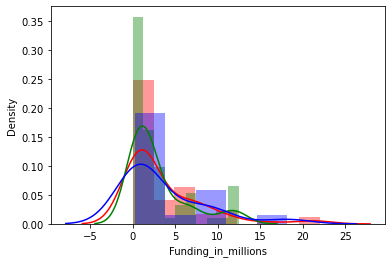

In [87]:
sns.distplot(NY_events, color = 'Red', label = 'NY')
sns.distplot(SF_events, color = 'Green', label = 'SF')
sns.distplot(EU_events, color = 'blue', label = 'EU')


We can see that almost the three cities have the same Mode and its right-skewed data.

# Summary of findings from analysis

Findings:

    - The amount of funds raised by a company doesnt seem to be a strong factor to decide if the company is still operating 
or it is in closed status.

    - We find no evidence to state that the companies that have raised more money tend to suceed more or vice-versa
    
    - Average funds raised by the companies across the three states are same
  
             
Improvements and Suggestions:
    
    - Reason for companies got closed can be shared for better understanding
    
    - Product developed by the companies could have been shared so that we could analyse if products are out of market etc
    
    - Geographical locations of companies could have been provided for further analysis on operating conditions of companies.
        
